In [2]:
home <- path.expand("~")
lib_dir <- file.path(file.path(home, "R"), "lib")
dir.create(lib_dir, showWarnings = FALSE)

library(utils)
.libPaths(c(lib_dir, .libPaths()))

# libraries needed for these graphs
install.packages("tidyverse")
library(tidyverse)
install.packages("plotly")
library(plotly)
install.packages("cowplot")
library(cowplot) 
set.seed(30250) # makes sure random numbers are reproducible

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To reco

## 3.4. Combinações de variáveis

Para identificar o melhor tipo de gráfico é preciso saber a informação que será tratada, identificando as variáveis:

* Variáveis **contínuas** são propriedades que podem ser medidas, como altura;
* Variáveis **discretas** são atributos que podem ser contados, como o número de cachorros que você tem.

Em relação a classificação das variáveis em categorias, é possível agrupá-las em dois grupos:

* Categorias **nominais** não possuem uma ordem explícita, tais como gatos e cachorros;
* Categorias **ordinais** representam relações de ordem, cuja distância entre as categorias não é fácilmente avaliada.

### 3.4.1. Exercícios

Levando em consideração as variáveis apresentadas e os tipos de gráfico utilizados na estatística, apresente o gráfico que melhor representa as seguintes combinações de variáveis:

1. 1 variável discreta;
2. 1 variável contínua;
3. 2 variáveis discretas;
4. 2 variáveis contínuas;
5. 1 variável discreta, 1 contínua;
6. 3 variáveis contínuas.

### 3.4.2. Dados

O código a seguir apresenta alguns _data frames_ com diferentes tipos de dado:

* `pets` tem uma coluna com o tipo de _pet_
* `pet_happy` possui os atributos `happiness`e `age` para 500 donos de cachorro e 500 donos de gato;
* `x_vs_y` apresenta duas variáveis correlacionadas: `x` e `y`;
* `overlap` possui duas variáveis ordinais correlacionadas e 1000 observações, então existe muita sobreposição;
* `overplot` possui duas variáveis contínuas correlacionadas e 10000 observações.

**Obs.:** Antes de iniciar, pense sobre o tipo de gráfico que são melhores para representar os diferentes tipos de dado.


In [4]:
pets <- tibble(
  pet = sample(
    c("dog", "cat", "ferret", "bird", "fish"), 
    100, 
    TRUE, 
    c(0.45, 0.40, 0.05, 0.05, 0.05)
  )
)

pet_happy <- tibble(
  pet = rep(c("dog", "cat"), each = 500),
  happiness = c(rnorm(500, 55, 10), rnorm(500, 45, 10)),
  age = rpois(1000, 3) + 20
)

x_vs_y <- tibble(
  x = rnorm(100),
  y = x + rnorm(100, 0, 0.5)
)

overlap <- tibble(
  x = rbinom(1000, 10, 0.5),
  y = x + rbinom(1000, 20, 0.5)
)

overplot <- tibble(
  x = rnorm(10000),
  y = x + rnorm(10000, 0, 0.5)
)

## 3.5. Gráficos básicos

### 3.5.1. Gráfico de barras

Gráficos de barra são úteis para representar dados organizados em categorias que se pode contar.

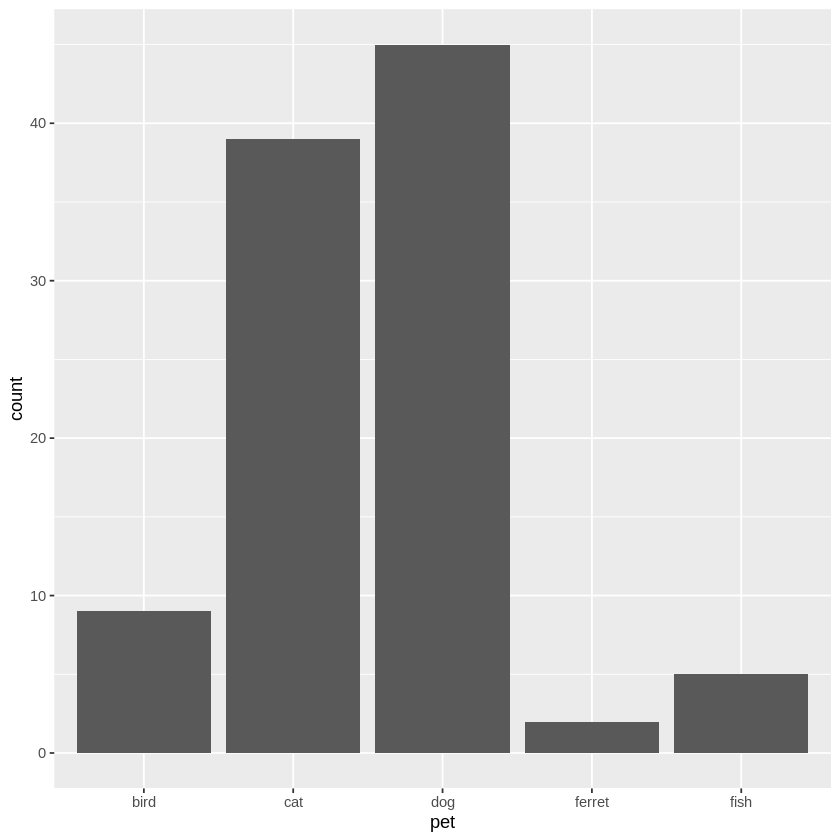

In [3]:
ggplot(pets, aes(pet)) +
  geom_bar()

# Aula 03 - Visualização de Dados

# 3.1. Objetivos de Aprendizagem

### 3.1.1. Básico

1. Entender os tipos de gráfico mais apropriados para diferentes tipos de dado
    * 1 variável discreta;
    * 1 variável contínua;
    * 2 variáveis discretas;
    * 2 variáveis contínuas;
    * 1 variável discreta, 1 contínua;
    * 3 variáveis contínuas.
2. Criar os tipos de gráfico mais comuns utilizando a biblioteca ggplot2
3. Ajustar os rótulos (_labels_) e as cores;
4. Representar desenhos fatoriais com diferentes cores e facetas;
5. Salvar os gráficos num arquivo de imagens.

### 3.1.2. Intermediário

6. Superposição de diferentes tipos de gráficos;
7. Adicionar linhas aos gráficos;
8. Tratar dados sobrepostos;
9. Criar tipos de gráfico menos comuns.

### 3.1.3. Avançado

10. Ajustar os gráficos num grid utilizando `cowplot`;
11. Ajustar os eixos (rotacionar coordenadas, ajustar limites dos eixos);
12. Alterar o tema;
13. Criar grãficos interativos utilizando `plotly`

## 3.2. Recursos

* [Capítulo 3: visualização de dados](https://r4ds.had.co.nz/data-visualisation.html) do livro _R for Data Science_
* [Capítulo 28: gráficos para comunicação](https://r4ds.had.co.nz/graphics-for-communication.html) do livro _R for Data Science_ 
* Capítulo [Graphs](http://www.cookbook-r.com/Graphs/) no livro _Cookbook for R_
* [Galeria de gráficos do R](https://www.r-graph-gallery.com/)
* Vários outros recursos sobre estatística e gráficos, ggplot2 e bibliotecas relacionadas.

## 3.3. Ajustes

### 3.5.2. Gráfico de densidade

Gráficos de densidade são úteis para uma única variável contínua, mas apenas se possuímos uma quantidade significativa de observações.

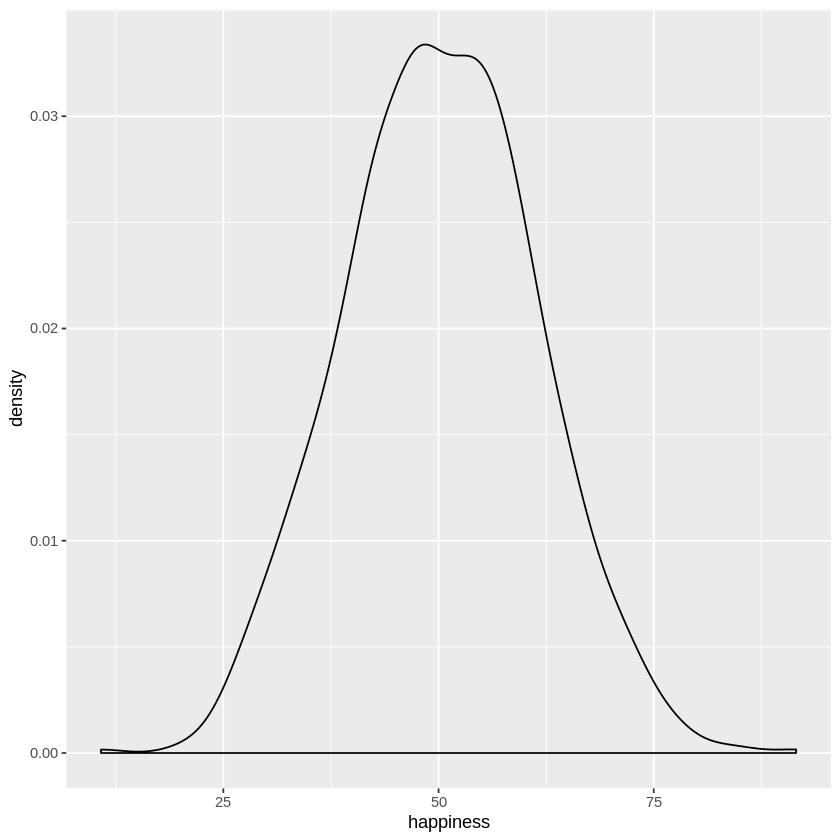

In [4]:
ggplot(pet_happy, aes(happiness)) +
  geom_density()

No gráfico de densidade é possível representar subconjuntos da variável atribuindo as categorias aos parâmetros `group`, `fill` ou `color`.

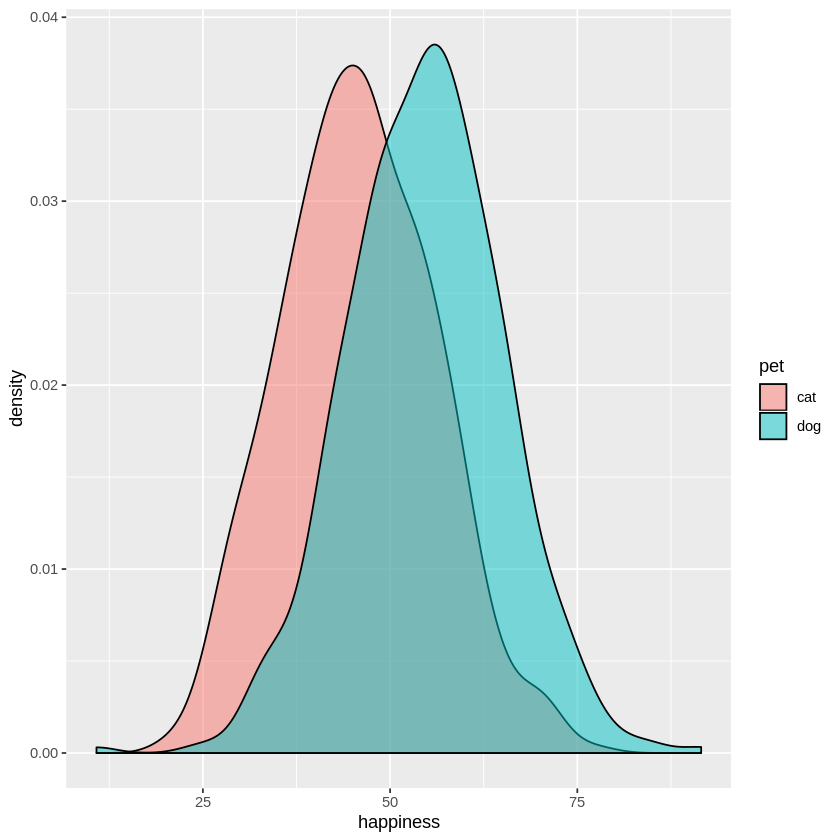

In [5]:
ggplot(pet_happy, aes(happiness, fill = pet)) +
  geom_density(alpha = 0.5)

Altere o valor de `alpha` e veja o que acontece no gráfico.

### 3.5.3. Polígonos de frequência

Se não for necessário suavizar as distribuições, utilize a função `geom_freqpoly()`:

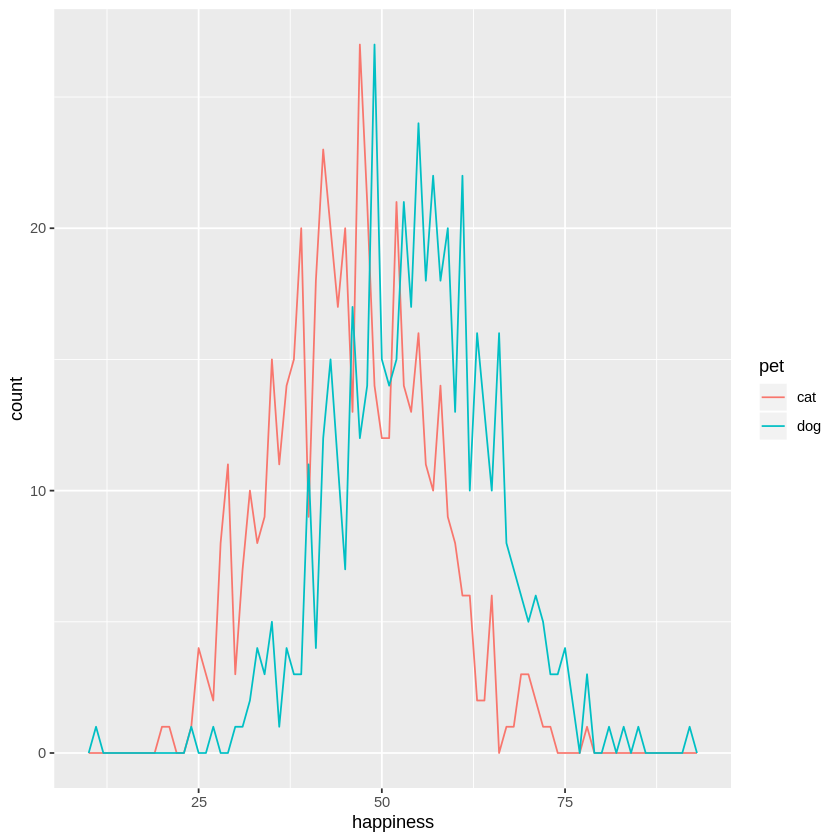

In [6]:
ggplot(pet_happy, aes(happiness, color = pet)) +
  geom_freqpoly(binwidth = 1)

Altere o valor de `binwidth` para 5 e 0.1. Como descobrir o valor ideal?

### 3.5.4. Histograma

Histogramas são muito bem utilizados quando possuímos apenas uma variável contínua e não há muitas observações. O parâmetro `binwidth` controla a largura de cada uma das barras.

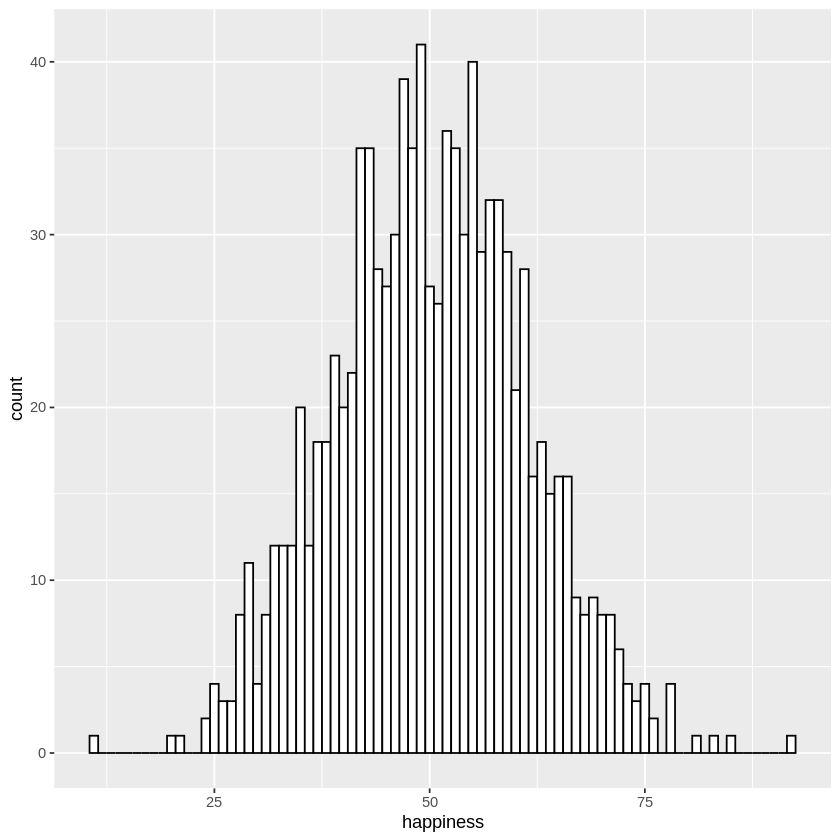

In [7]:
ggplot(pet_happy, aes(happiness)) +
  geom_histogram(binwidth = 1, fill = "white", color = "black")

Perceba que, sem alterar a cor de preenchimento do gráfico, fica difícil analisar a variação das informações.

Observemos o efeito utilizando dois histogramas separados por um espaço, definido pelo parâmetro `position`.

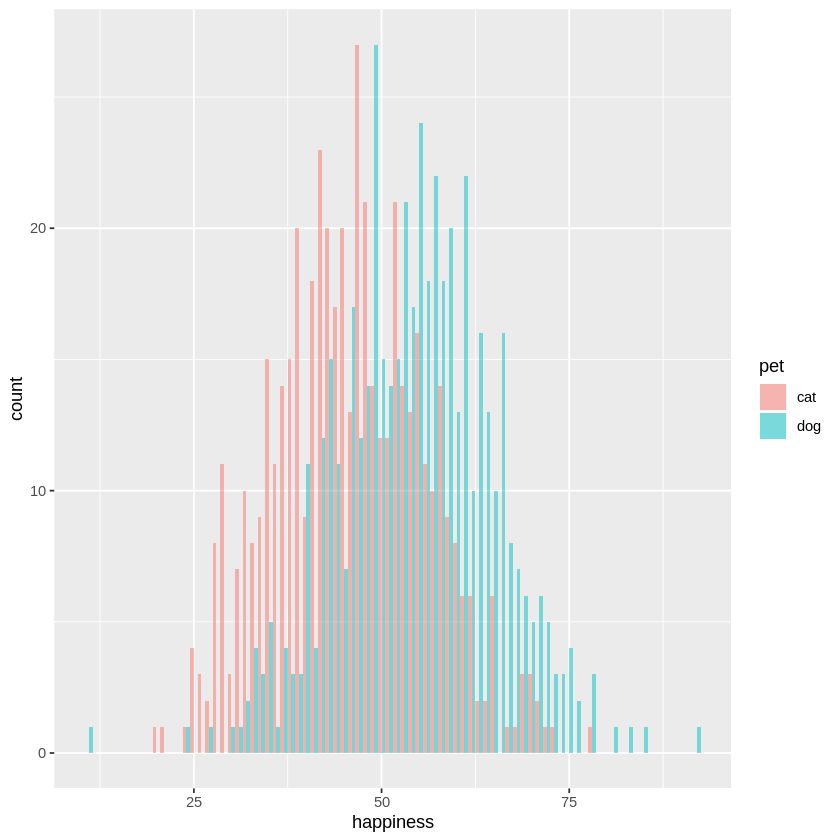

In [8]:
ggplot(pet_happy, aes(happiness, fill=pet)) +
  geom_histogram(binwidth = 1, alpha = 0.5, position = "dodge")

Agora tente alterar o parâmetro `position` para "identity", "fill", "dodge", ou "stack". 

### 3.5.5. Gráfico de colunas

Gráfico de colunas é a pior forma de representar dados contínuos agrupados, mas também é a mais comum.

Para criar gráficos de colunas com barras de erro, primeiro é necessário calcular  média, limite de erro superior (`ymax`) e limite de erro inferior (`ymin`) para cada uma das categorias.

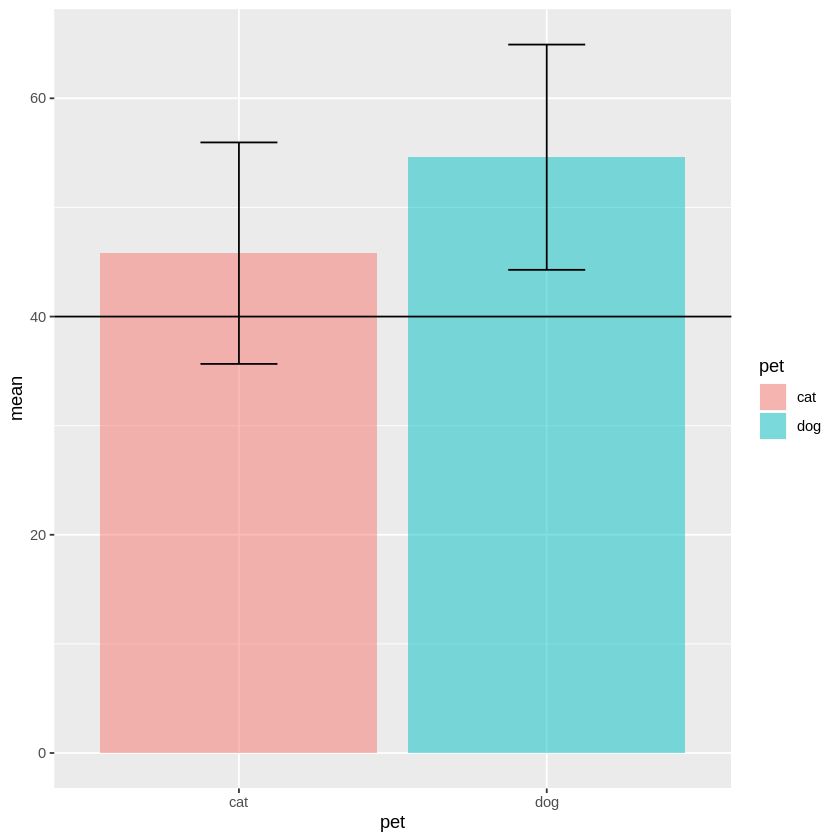

In [9]:
# calculate mean and SD for each pet
avg_pet_happy <- pet_happy %>%
  group_by(pet) %>%
  summarise(
    mean = mean(happiness),
    sd = sd(happiness)
  )

ggplot(avg_pet_happy, aes(pet, mean, fill=pet)) +
  geom_col(alpha = 0.5) +
  geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd), width = 0.25) +
  geom_hline(yintercept = 40)

Para que serve a chamada geom_hline()?

### 3.5.6. Boxplot

Boxplots são muito úteis para agrupar a distribuição de variáveis contínuas, corrigindo a maior parte dos problemas encontrados na utilização de gráficos de barra para dados contínuos.

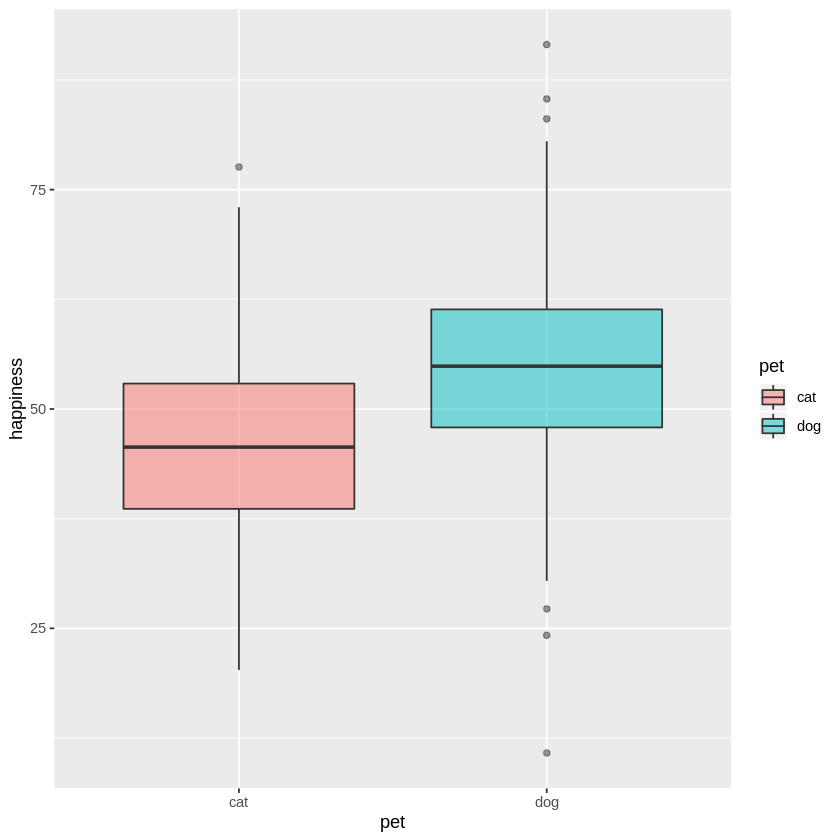

In [10]:
ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_boxplot(alpha = 0.5)

### 3.5.7. Gráficos de violino

Gráficos de violino são representações invertidas dos gráficos de densidade. Fornecem ainda mais informações que o boxplot sobre a distribuição dos valores, sendo especialmente úteis quando a distribuição dos valores não é normal.

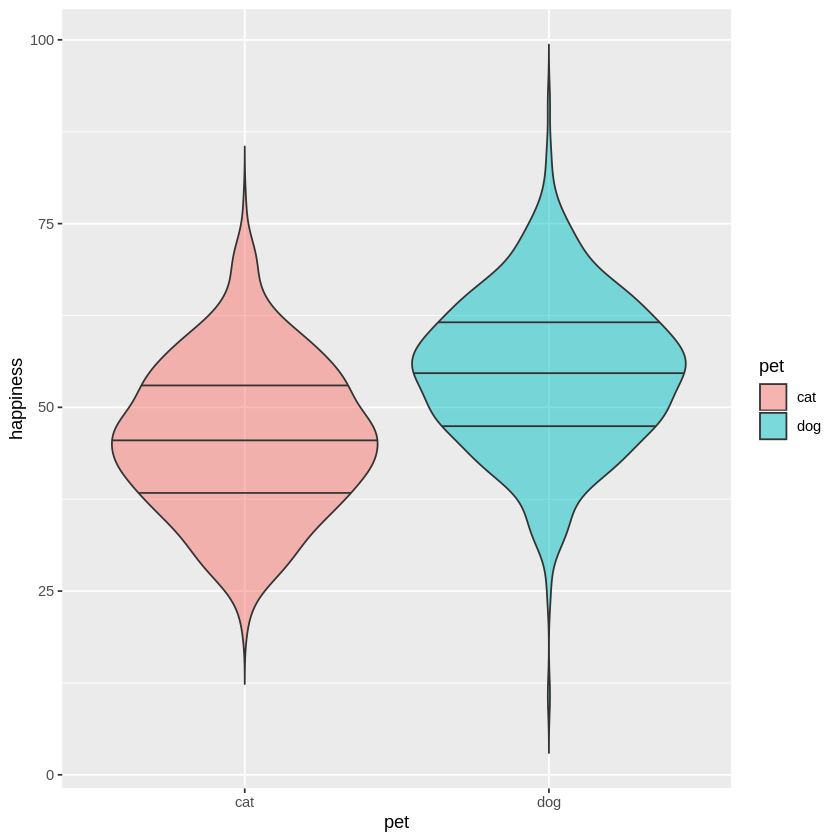

In [11]:
ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_violin(
    trim = FALSE,
    draw_quantiles = c(0.25, 0.5, 0.75), 
    alpha = 0.5
  )

Tente alterar os números no parâmetro `draw_quantiles`

### 3.5.8. Gráficos de dispersão

Gráficos de dispersão são uma boa forma de representar a relação entre duas variáveis contínuas.

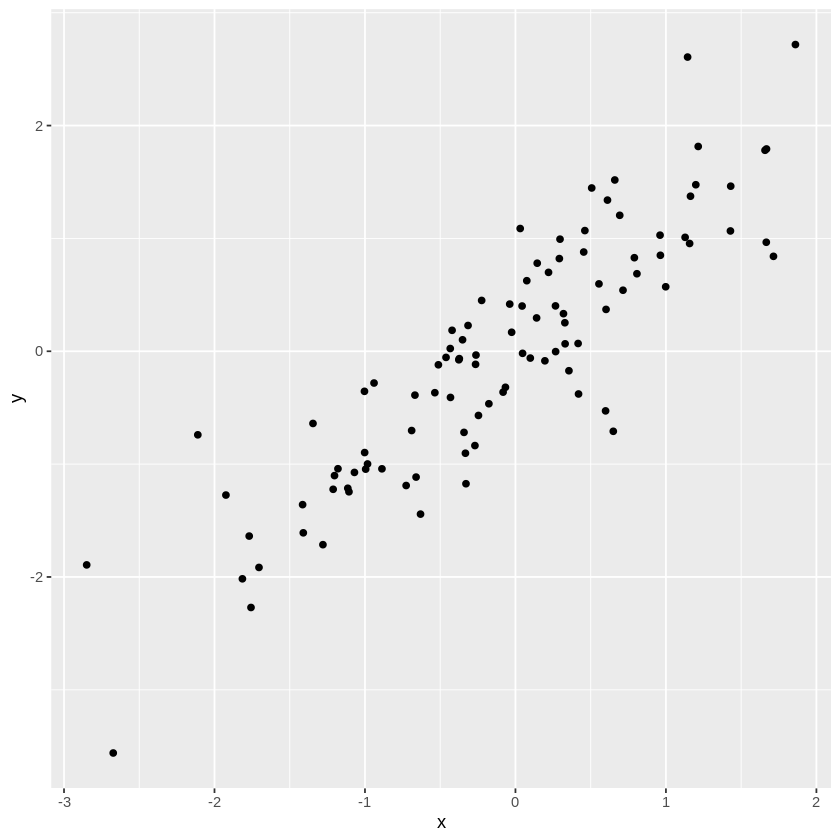

In [12]:
ggplot(x_vs_y, aes(x, y)) +
  geom_point()

### 3.5.9. Gráfico de linha

Ás vezes é possível apresentar a correlação entre duas variáveis como uma reta.

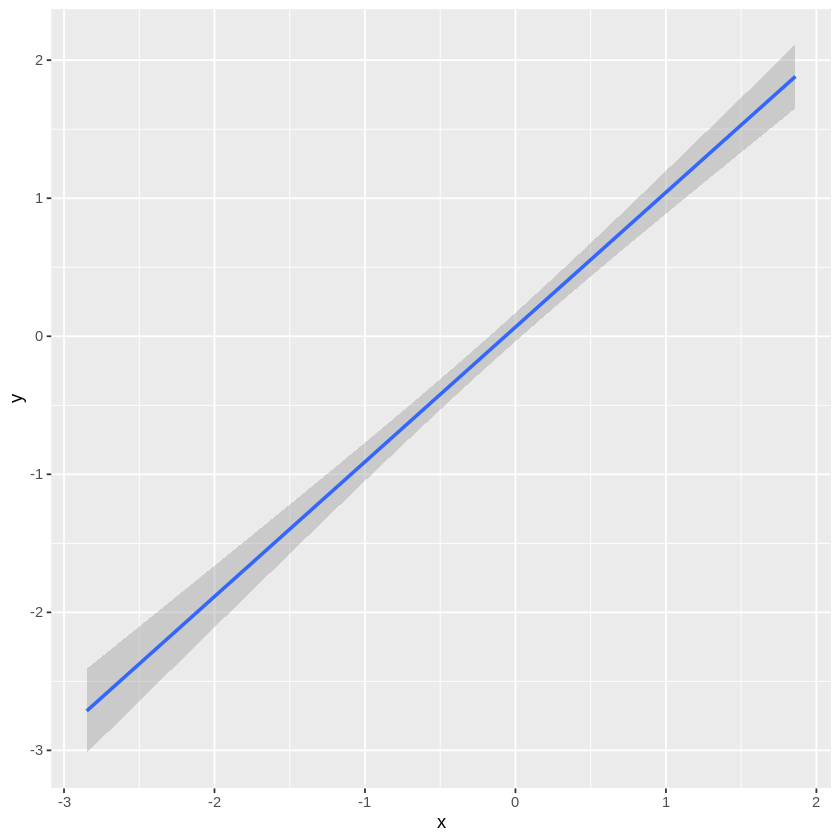

In [13]:
ggplot(x_vs_y, aes(x, y)) +
  geom_smooth(method="lm")

## 3.6. Customizações

### 3.6.1. Rótulos ( _labels_ )

É possível alterar o título e o rótulo dos eixos de diferentes formas.

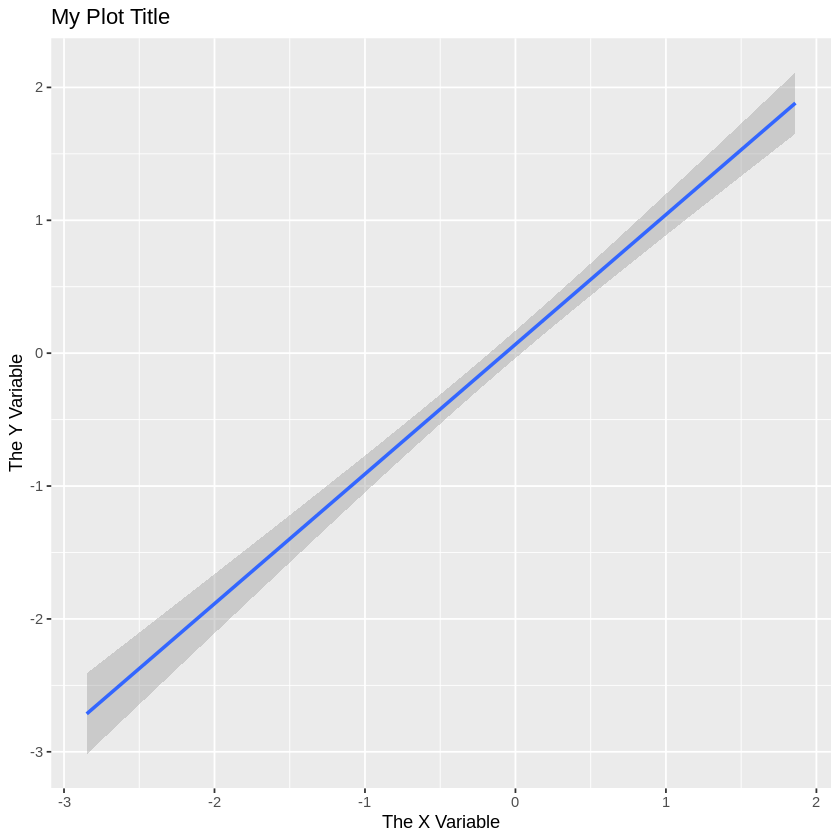

In [14]:
ggplot(x_vs_y, aes(x, y)) +
  geom_smooth(method="lm") +
  ggtitle("My Plot Title") +
  xlab("The X Variable") +
  ylab("The Y Variable")

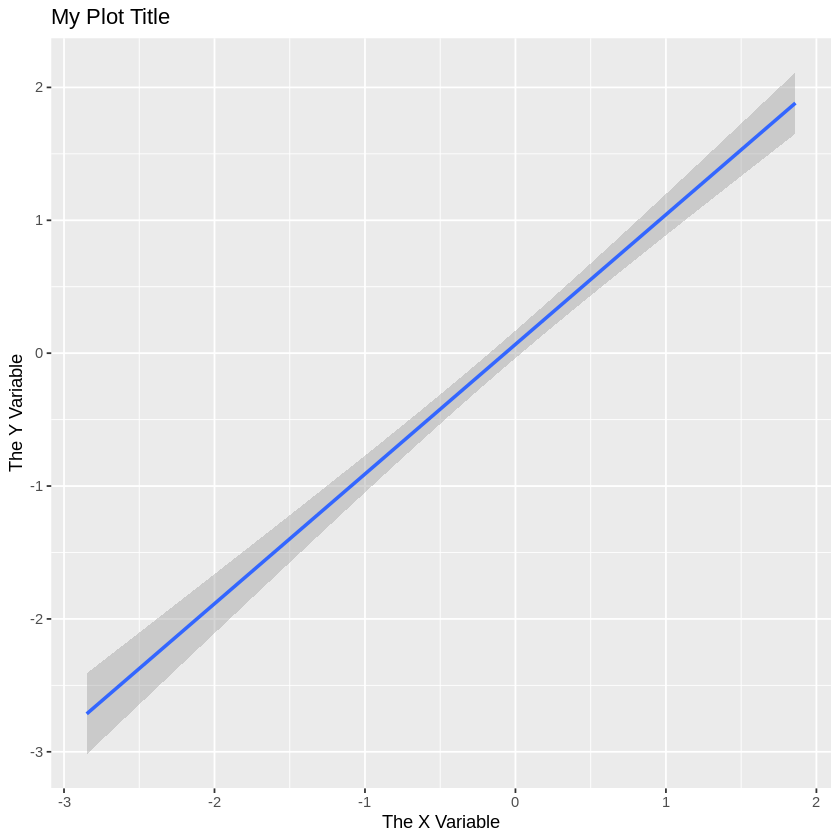

In [15]:
ggplot(x_vs_y, aes(x, y)) +
  geom_smooth(method="lm") +
  labs(title = "My Plot Title",
       x = "The X Variable",
       y = "The Y Variable")

### 3.6.2. Cores

É possível alterar o valor da cor das linhas e do preenchimento utilizando funções como `scale_colour_manual()` e `scale_fill_manual()`. O [capítulo de cores do livro _Cookbook for R_](http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/)  apresenta mais informações sobre como alterar a cor dos gráficos.

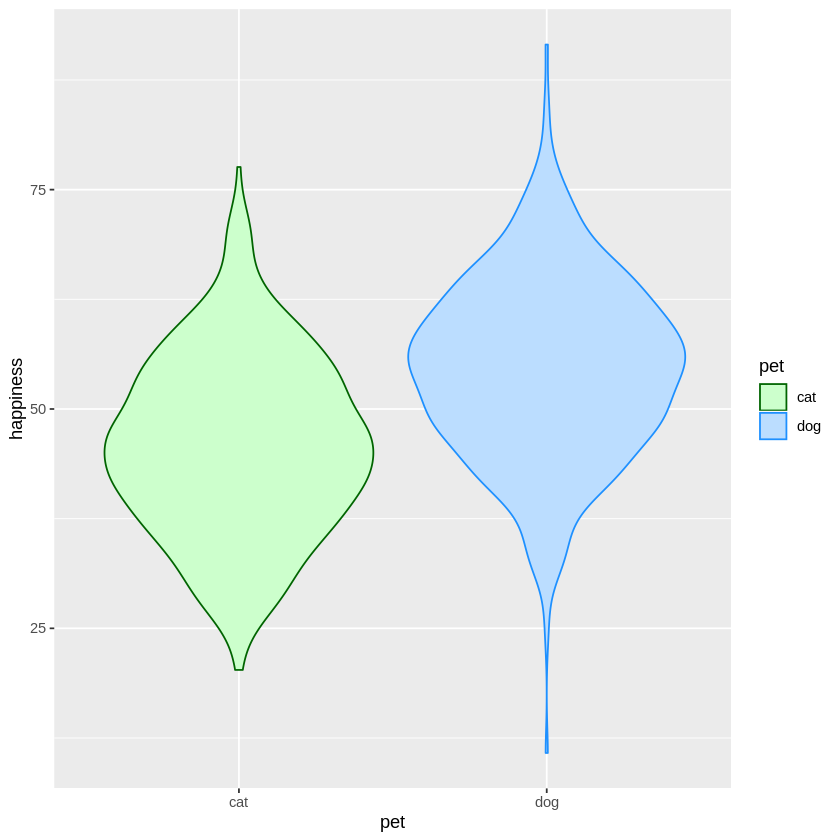

In [16]:
ggplot(pet_happy, aes(pet, happiness, colour = pet, fill = pet)) +
  geom_violin() +
  scale_color_manual(values = c("darkgreen", "dodgerblue")) +
  scale_fill_manual(values = c("#CCFFCC", "#BBDDFF"))

### 3.6.3. Salvar o gráfico como um arquivo

A função `ggsave()` pode ser utilizada para salvar um gráfico gerado no arquivo. Por padrão a função sempre salva o último gráfico gerado, mas é possível especificar qual gráfico deve ser salvo se for atribuído a uma variável. Ao utilizar seu notebook, salve os arquivos na pasta **output** para evitar conflito com o sistema de controle de versão.

Também é possível ajustar os valores de `width` e `height` no gráfico.

In [17]:
box <- ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_boxplot(alpha = 0.5)

violin <- ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_violin(alpha = 0.5)

ggsave("output/demog_violin_plot.png", width = 5, height = 7)

ggsave("output/demog_box_plot.jpg", plot = box, width = 5, height = 7)

## 3.7. Combinação de gráficos

### 3.7.1. Gráfico de violino

Para demonstrar o uso da função `facet_grid()` para desenhos fatoriais criamos uma coluna chamada `agegroup`, divindo os participantes entre aqueles cuja idade está abaixo e acima da mediana. Novos fatores serão apresentados em ordem alfabética, então utilizamos a função `factor()` para ajustar os níveis na ordem desejada.

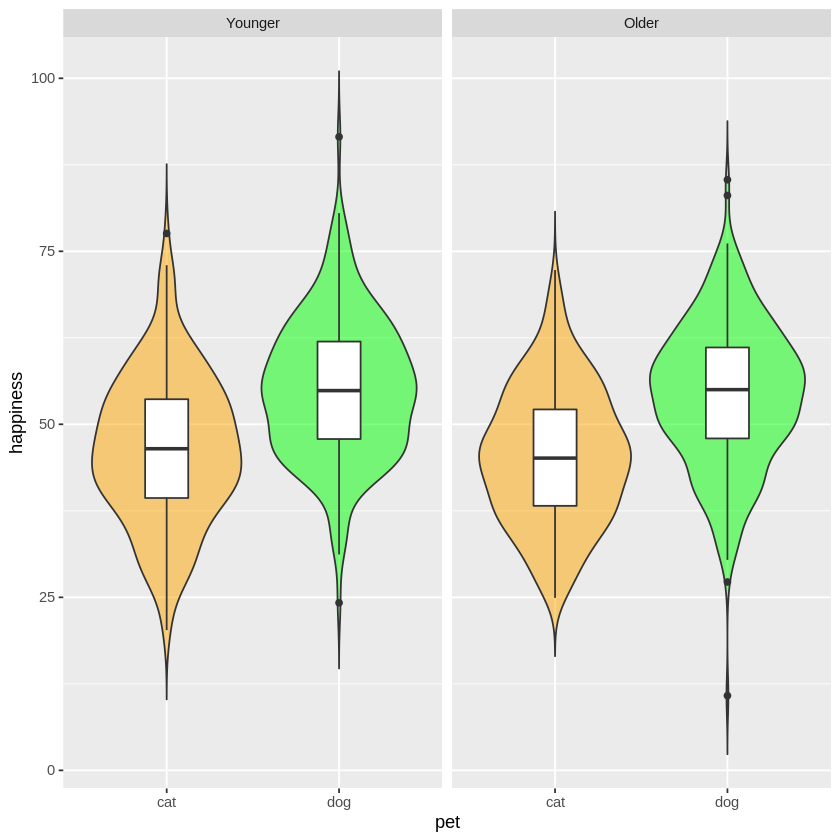

In [18]:
pet_happy %>%
  mutate(agegroup = ifelse(age<median(age), "Younger", "Older"),
         agegroup = factor(agegroup, levels = c("Younger", "Older"))) %>%
  ggplot(aes(pet, happiness, fill=pet)) +
    geom_violin(trim = FALSE, alpha=0.5, show.legend = FALSE) +
    geom_boxplot(width = 0.25, fill="white") +
    facet_grid(.~agegroup) +
    scale_fill_manual(values = c("orange", "green"))

Utilize o atributo `show.legend = FALSE` para esconder a legenda. É necessário fazer isso porque o eixo x já tem os tipos de pet.

### 3.7.2. Gráfico de violino com _point-range_ 

É possível utilizar a função `stat_summary()` para sobrepor um gráfico de _point-range_ mostrando a média de +-1 SD. Também é possível utilizar funções customizadas.

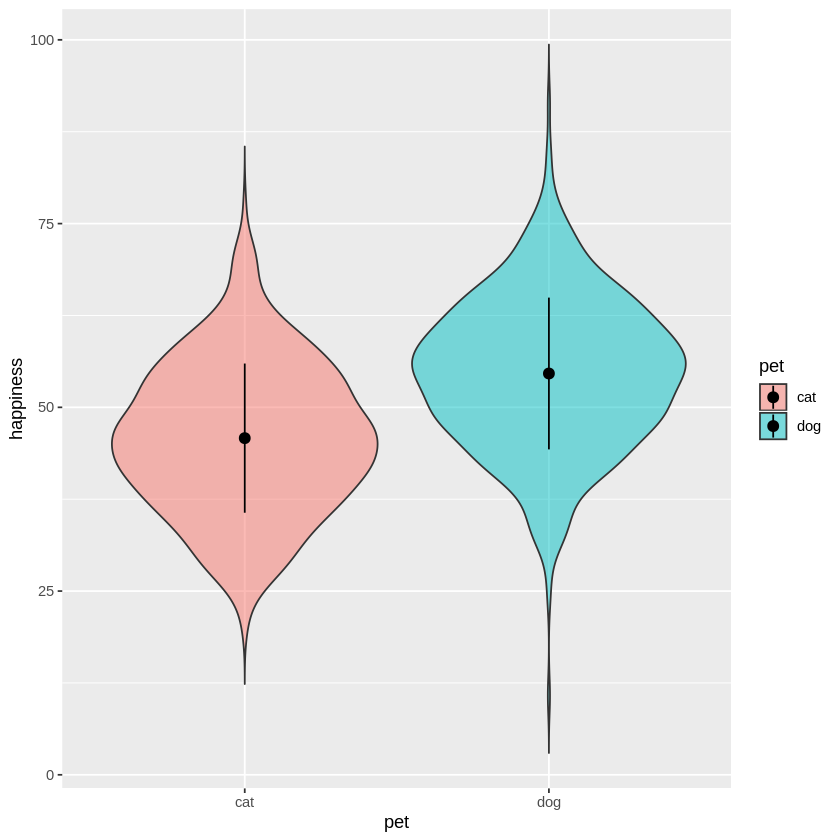

In [19]:
ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_violin(
    trim = FALSE,
    alpha = 0.5
  ) +
  stat_summary(
    fun.y = mean,
    fun.ymax = function(x) {mean(x) + sd(x)},
    fun.ymin = function(x) {mean(x) - sd(x)},
    geom="pointrange"
  )

### 3.7.3. Gráfico de violino com variância

Se o dataset utilizando não possui muitas observações talvez seja melhor representá-las individualmente. A função `geom_jitter` auxilia nessa utilização.

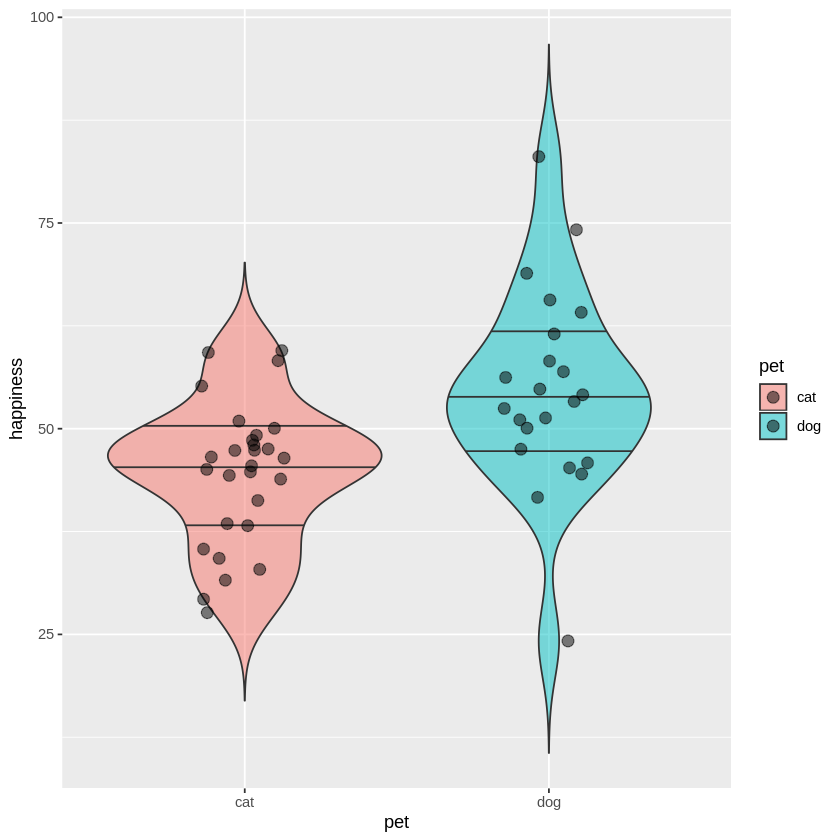

In [20]:
pet_happy %>%
  sample_n(50) %>%  # choose 50 random observations from the dataset
  ggplot(aes(pet, happiness, fill=pet)) +
  geom_violin(
    trim = FALSE,
    draw_quantiles = c(0.25, 0.5, 0.75), 
    alpha = 0.5
  ) + 
  geom_jitter(
    width = 0.15, # points spread out over 15% of available width
    height = 0, # do not move position on the y-axis
    alpha = 0.5, 
    size = 3
  )

### 3.7.4. Gráfico de dispersão com linha

Se o gráfico não for muito complexo talvez seja interessante mostrar os dados que resultaram no gráfico.

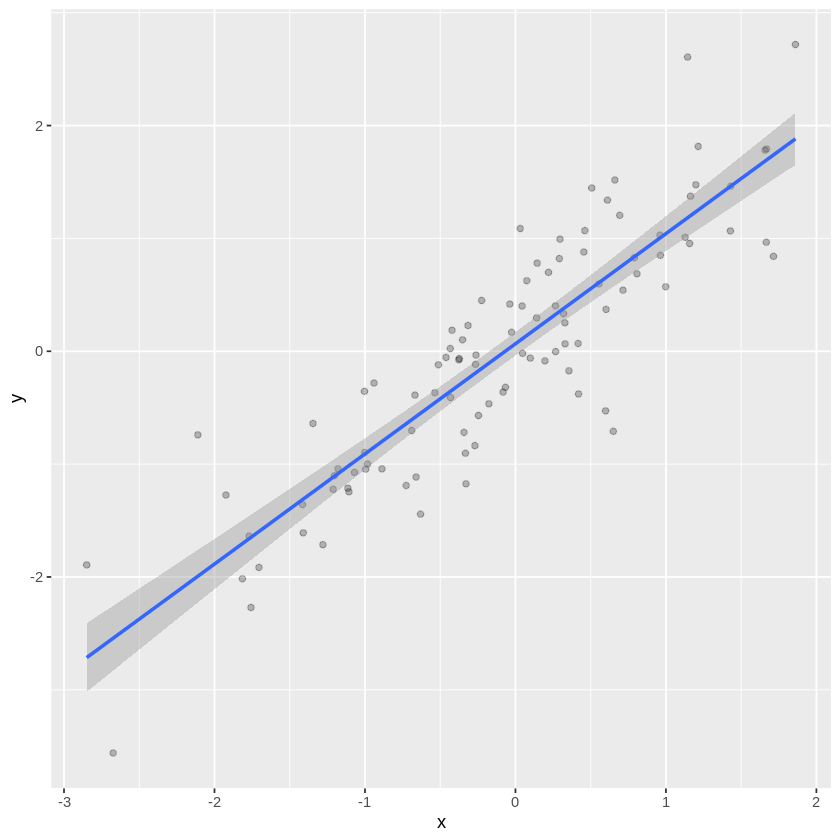

In [21]:
ggplot(x_vs_y, aes(x, y)) +
  geom_point(alpha = 0.25) +
  geom_smooth(method="lm")

### 3.7.5. Grids de gráficos

O pacote `cowplot` auxilia a criação de grids para diferentes gráficos. Primeiro, atribuímos um nome ao gráfico; em seguida a função `plot_grid()` recebe, como seus primeiros parâmetros, a lista de todos os gráficos, além de fornecer uma lista de rótulos.

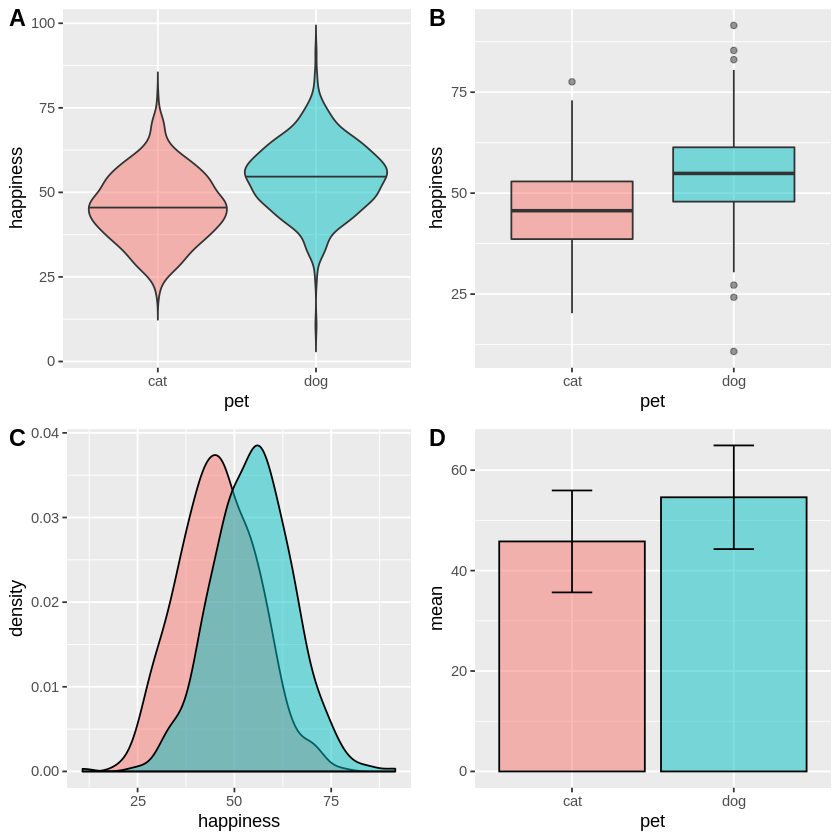

In [22]:
my_hist <- ggplot(pet_happy, aes(happiness, fill=pet)) +
  geom_histogram(
    binwidth = 1, 
    alpha = 0.5, 
    position = "dodge", 
    show.legend = FALSE
  )

my_violin <- ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_violin(
    trim = FALSE,
    draw_quantiles = c(0.5), 
    alpha = 0.5, 
    show.legend = FALSE
  )

my_box <- ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_boxplot(alpha=0.5, show.legend = FALSE)

my_density <- ggplot(pet_happy, aes(happiness, fill=pet)) +
  geom_density(alpha=0.5, show.legend = FALSE)

my_bar <- pet_happy %>%
  group_by(pet) %>%
  summarise(
    mean = mean(happiness),
    sd = sd(happiness)
  ) %>%
  ggplot(aes(pet, mean, fill=pet)) +
    geom_bar(stat="identity", alpha = 0.5, 
             color = "black", show.legend = FALSE) +
    geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd), width = 0.25)

plot_grid(
  my_violin, 
  my_box, 
  my_density, 
  my_bar, 
  labels = c("A", "B", "C", "D")
)

## 3.8. Sobrepondo dados discretos

### 3.8.1. Reduzindo a opacidade

Reduzir a opacidade dos pontos auxilia a sobreposição de dados, especialmente ao utilizar escalas especializadas.

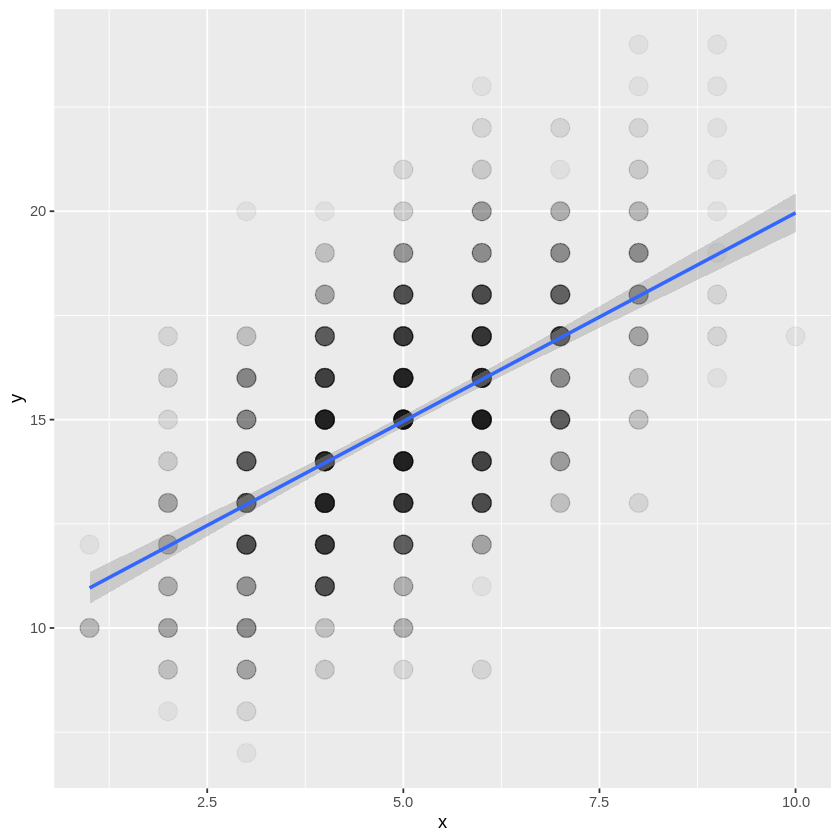

In [23]:
ggplot(overlap, aes(x, y)) +
  geom_point(size = 5, alpha = .05) +
  geom_smooth(method="lm")

### 3.8.2. Gráficos de pontos proporcionais

A função `geom_count()` permite desenhar pontos proporcionais às observações sobrepostas.

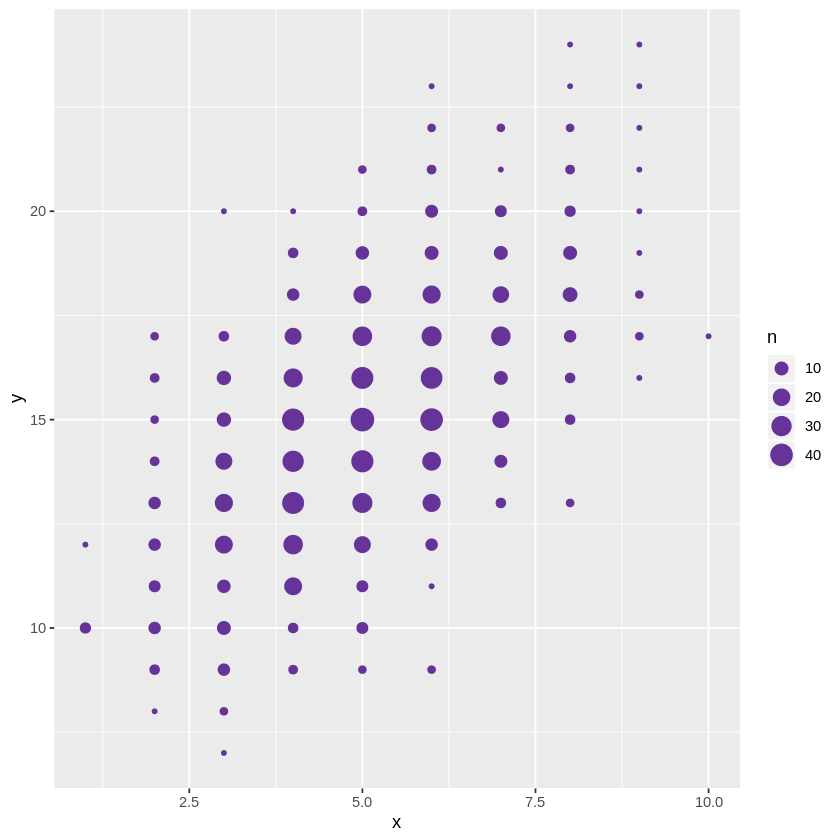

In [24]:
overlap %>%
  ggplot(aes(x, y)) +
  geom_count(color = "#663399")

Também é possível criar uma coluna que conta as ocorrências e utilizá-la  para ajustar a cor dos pontos.

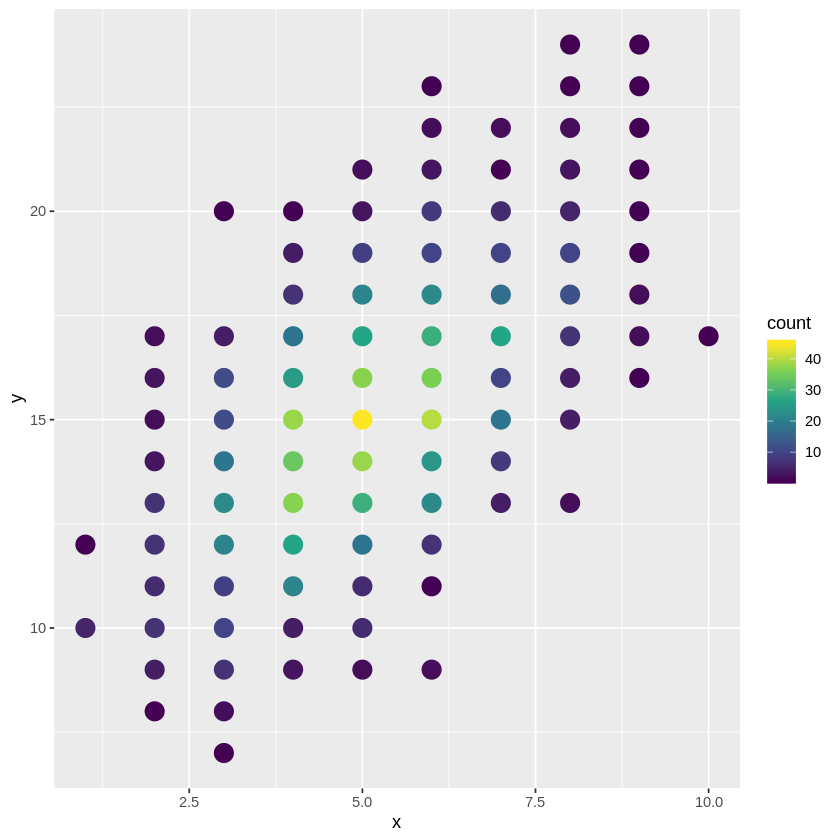

In [25]:
overlap %>%
  group_by(x, y) %>%
  summarise(count = n()) %>%
  ggplot(aes(x, y, color=count)) +
  geom_point(size = 5) +
  scale_color_viridis_c()

## 3.9. Sobrepondo dados contínuos

Mesmo que as variáveis sejam contínuas, traçar pontos demais pode esconder as relações e o conjunto de dados for muito grande.

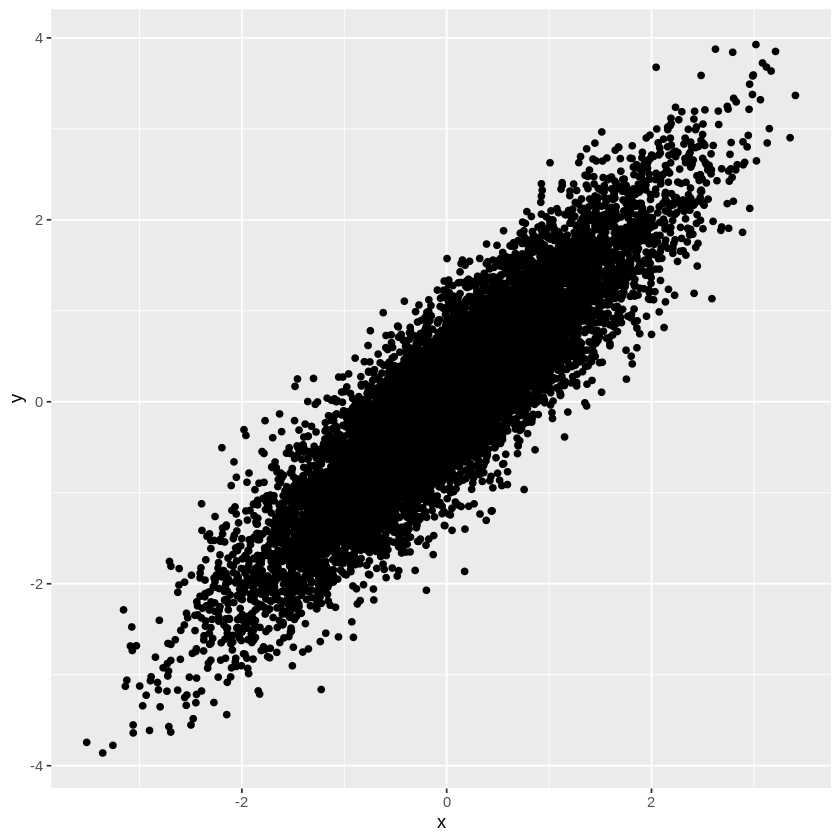

In [26]:
overplot %>%
  ggplot(aes(x, y)) + 
  geom_point()

### 3.9.1. Gráfico de densidade 2G

Utilize a função `geom_density2d()` para criar um gráfico de contorno.

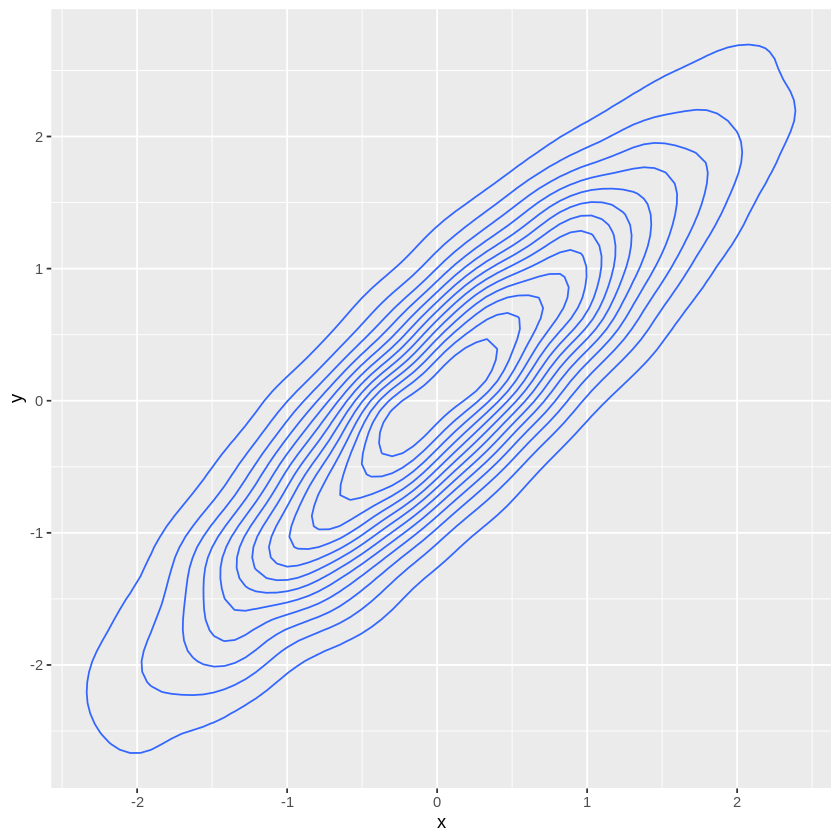

In [27]:
overplot %>%
  ggplot(aes(x, y)) + 
  geom_density2d()

Utilizar a função `stat_density_2d(aes(fill = ..level..), geom = "polygon")` altera o formato para mapa de calor.

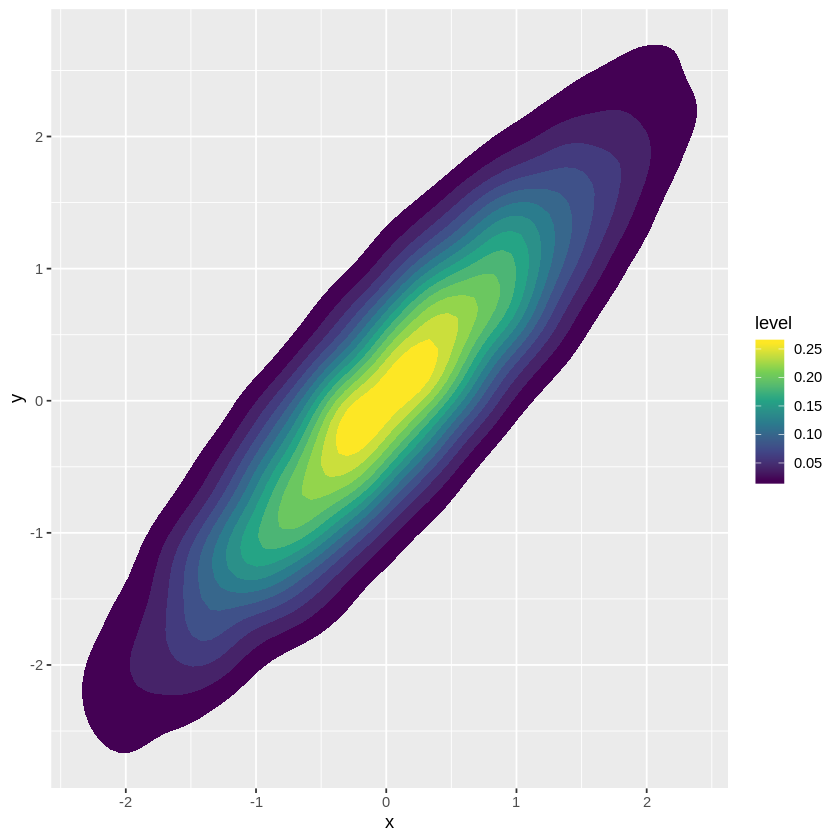

In [28]:
overplot %>%
  ggplot(aes(x, y)) + 
  stat_density_2d(aes(fill = ..level..), geom = "polygon") +
  scale_fill_viridis_c()

### 3.9.2. Histograma 2D

Utilize a função `geom_bin2d()` para criar um mapa de calor retangular de contagem binária. Ajuste o parâmetro `binwidth` para as dimensões x e y para cada box.

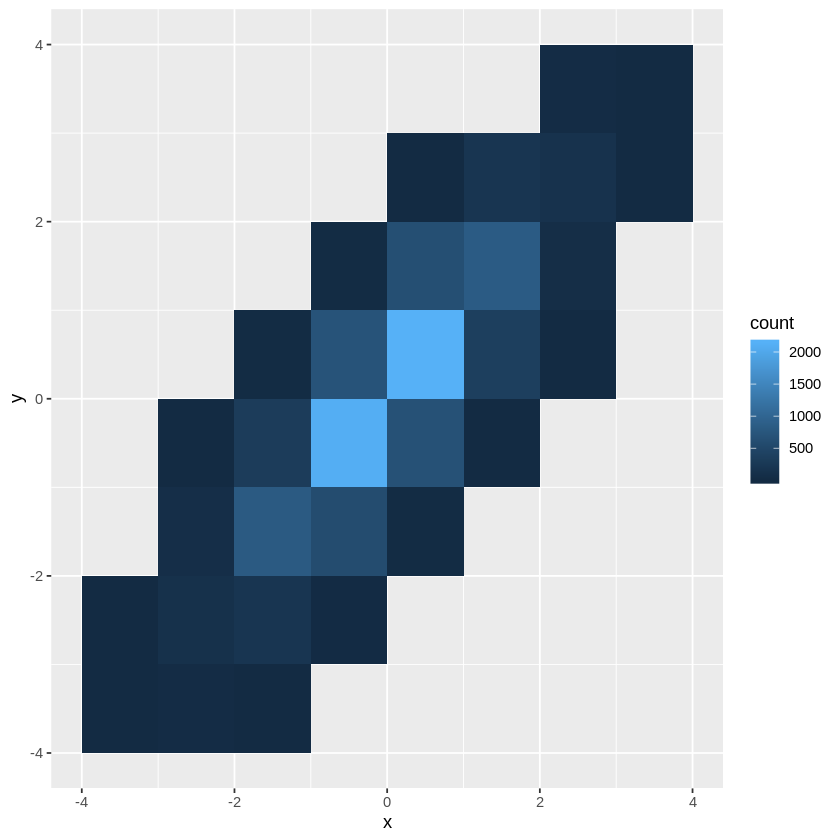

In [29]:
overplot %>%
  ggplot(aes(x, y)) + 
  geom_bin2d(binwidth = c(1,1))

### 3.9.3. Mapa de calor hexagonal

Utilize a função `geomhex()` para criar um mapa de calor hexagonal de contagem binária. O parâmetro `binwidth` e as funções `xlim()` e `ylim()` controlam a geometria do gráfico.

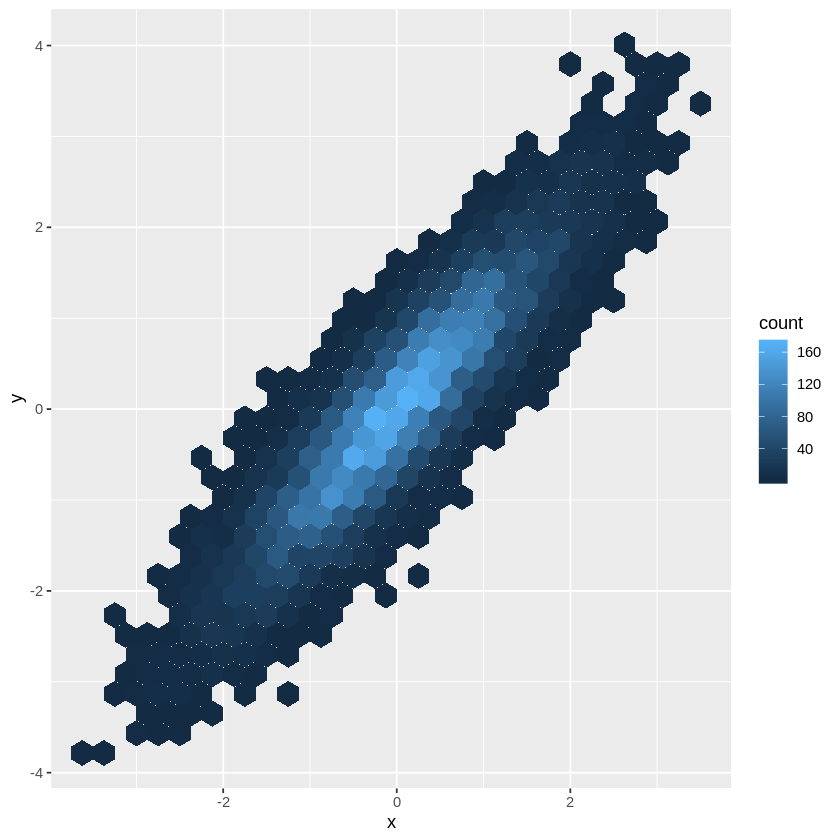

In [30]:
overplot %>%
  ggplot(aes(x, y)) + 
  geom_hex(binwidth = c(0.25, 0.25))

### 3.9.4. Mapa de calor de correlação

O gráfico a seguir apresenta uma matriz de correlação entre duas variáveis. Os pontos mais próximos do amarelo representam maior correlação entre as variáveis.

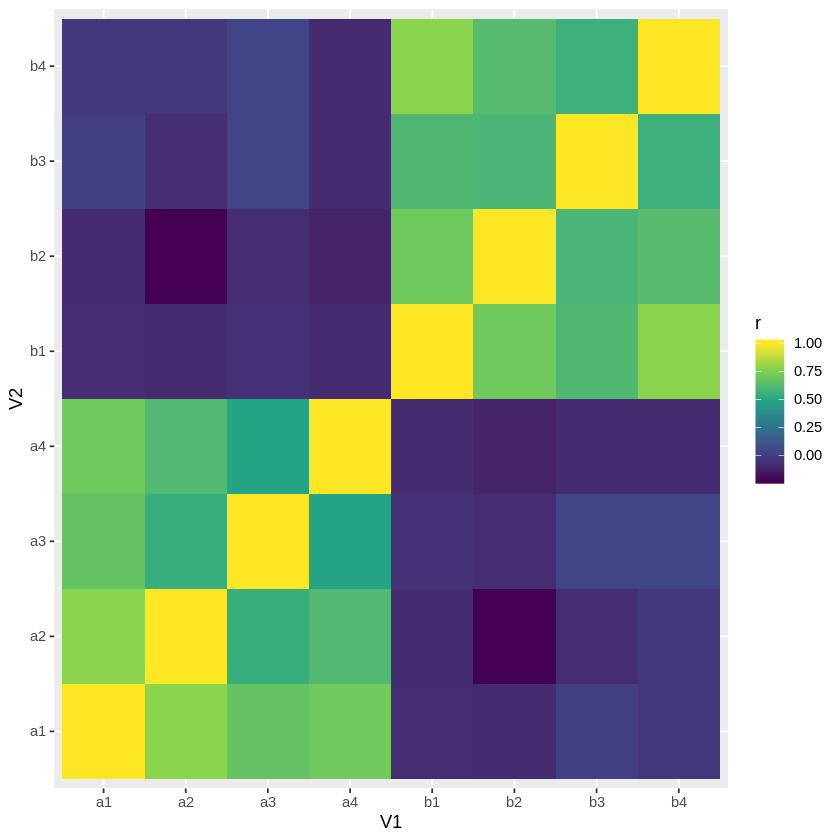

In [3]:
# generate two sets of correlated variables (a and b)
heatmap <- tibble(
    a1 = rnorm(100),
    b1 = rnorm(100)
  ) %>% 
  mutate(
    a2 = a1 + rnorm(100),
    a3 = a1 + rnorm(100),
    a4 = a1 + rnorm(100),
    b2 = b1 + rnorm(100),
    b3 = b1 + rnorm(100),
    b4 = b1 + rnorm(100)
  ) %>%
  cor() %>% # create the correlation matrix
  as.data.frame() %>% # make it a data frame
  rownames_to_column(var = "V1") %>% # set rownames as V1
  gather("V2", "r", a1:b4) # wide to long (V2)

ggplot(heatmap, aes(V1, V2, fill=r)) +
  geom_tile() +
  scale_fill_viridis_c()

## 3.10. Gráficos interativos

O pacote `plotly` permite a criação de gráficos interativos. Basta gerar um gráfico utilizando `ggplot`, salvar o resultado em uma variável e utilizar a função `ggplotly()`.

**Obs.:** O exemplo deve ser testado no terminal. A execução no Notebook pode travar o computador.

```
demog_plot <- ggplot(pet_happy, aes(pet, happiness, fill=pet)) +
  geom_point(position = position_jitter(width= 0.2, height = 0), size = 2)

ggplotly(demog_plot)
```

## 3.11. Exercícios